# London 2014 elections results

## Requirements

- gnu make
- wget
- iconv
- unzip

## Datasets

- https://data.london.gov.uk/download/statistical-gis-boundary-files-london/b381c92b-9120-45c6-b97e-0f7adc567dd2/London-wards-2014.zip
- https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv

The csv file needs to be converted into UTF-8.

A make task is provided to prepare data for analysis:

```bash
make setup
```

## References

- https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [1]:
import geopandas as gpd

shapefile = 'datasets/data_london_gov_uk/London-wards-2014 (1)/London-wards-2014_ESRI/London_Ward.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)

# gdf.head()

In [2]:
import pandas as pd

df = pd.read_csv('datasets/data_london_gov_uk/london-borough-profiles-utf8.csv', header=0)

# df.head()

In [3]:
df = df[['Code', 
         'Area_name', 
         'Proportion_of_seats_won_by_Conservatives_in_2014_election', 
         'Proportion_of_seats_won_by_Labour_in_2014_election', 
         'Proportion_of_seats_won_by_Lib_Dems_in_2014_election']]

data_for_map = df.rename(index=str, columns={"Proportion_of_seats_won_by_Conservatives_in_2014_election": "conservatives",
"Proportion_of_seats_won_by_Labour_in_2014_election": "labour",
"Proportion_of_seats_won_by_Lib_Dems_in_2014_election": "libdems"})

# check dat dataframe

# data_for_map.head()

In [4]:
# join the geodataframe with the cleaned up csv dataframe

merged = gdf.set_index('LB_GSS_CD').join(data_for_map.set_index('Code'))

# merged.head()

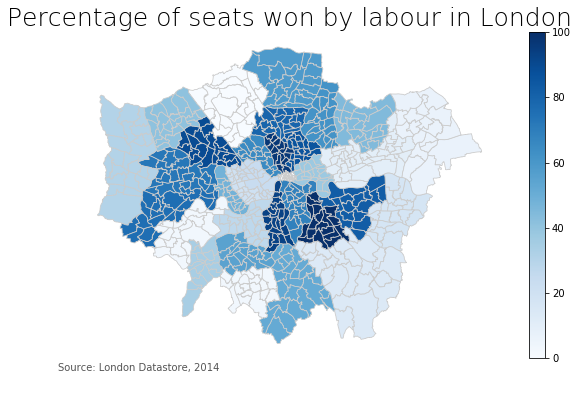

In [7]:
import matplotlib.pyplot as plt

# set a variable that will call whatever column we want to visualise on the map
# conservatives, labour, libdems
variable = 'labour' 

# set the range for the choropleth
vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
data_title = f"Percentage of seats won by {variable} in London"
ax.set_title(data_title, \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
# uncomment the next two lines to save map to file.
filename = f"figures/{variable}-map.png"
fig.savefig(filename, dpi=300)